In [1]:
# wget https://raw.githubusercontent.com/Vaseekaran-V/Datastorm-3/main/data/train_data_modified.csv?token=GHSAT0AAAAAABS4N64JYNY6EXMSZROSSTSOYSJQHMQ
# !wget https://raw.githubusercontent.com/Vaseekaran-V/Datastorm-3/main/data/validation_data.csv?token=GHSAT0AAAAAABS4N64JIDICIDNZNGXSE2HGYSIQRIQ
# !wget https://raw.githubusercontent.com/Vaseekaran-V/Datastorm-3/main/data/test_data.csv?token=GHSAT0AAAAAABS4N64J3BGH5UCQAEMW3NK2YSIQR7A

## Import Libraries

In [1]:
def week_id_valid(week):
  if week=="w1":    return 1
  elif week=="w2":    return 2
  elif week=="w3": return 3
  else: return 4

In [2]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
def calculate_results(y_true, y_pred):
  return {'mae':mean_absolute_error(y_true, y_pred),
          'mape': mean_absolute_percentage_error(y_true, y_pred)}

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## https://www.mariofilho.com/how-to-predict-multiple-time-series-with-scikit-learn-with-sales-forecasting-example/

In [4]:
train_data = pd.read_csv(r"../data/train_data_modified.csv")
train_data

,CategoryCode,ItemCode,Week,id,WeeklySales
0,category_2,174436,w1,1,35
1,category_2,118033,w1,1,7
2,category_2,20824,w1,1,53
3,category_1,1061341,w1,1,18
4,category_1,76399,w1,1,21
...,...,...,...,...,...
3767,category_1,1044619,w4,20,45
3768,category_4,23200,w4,20,22
3769,category_1,1084498,w4,20,7
3770,category_4,872260,w4,20,12


In [5]:
valid_data = pd.read_csv(r'../data/validation_data.csv')
valid_data['id'] = [week_id_valid(week)+20 for week in valid_data['Week']]
valid_data.sort_values(by='id', inplace = True)
valid_data

,CategoryCode,ItemCode,Week,WeeklySales,id
0,category_2,1044502,w1,11,21
142,category_1,48940,w1,22,21
269,category_1,35584,w1,15,21
138,category_2,59749,w1,33,21
137,category_2,132028,w1,112,21
...,...,...,...,...,...
139,category_2,118033,w4,12,24
140,category_2,1098502,w4,4,24
268,category_2,1010068,w4,19,24
146,category_2,211309,w4,23,24


In [6]:
test_data = pd.read_csv('../data/test_data.csv')
test_data['id'] = [week_id_valid(week)+20 for week in test_data['Week']]
test_data

,CategoryCode,ItemCode,Week,PredictedSales,id
0,category_1,43738,w4,NaN,24
1,category_2,1006090,w1,NaN,21
2,category_2,1076929,w4,NaN,24
3,category_1,1081321,w3,NaN,23
4,category_2,216151,w4,NaN,24
...,...,...,...,...,...
372,category_2,1101571,w1,NaN,21
373,category_2,1090258,w4,NaN,24
374,category_2,906595,w1,NaN,21
375,category_2,32245,w1,NaN,21


## Adding train and valid dataset together

In [7]:
train_valid = pd.concat([train_data, valid_data])
train_valid

,CategoryCode,ItemCode,Week,id,WeeklySales
0,category_2,174436,w1,1,35
1,category_2,118033,w1,1,7
2,category_2,20824,w1,1,53
3,category_1,1061341,w1,1,18
4,category_1,76399,w1,1,21
...,...,...,...,...,...
139,category_2,118033,w4,24,12
140,category_2,1098502,w4,24,4
268,category_2,1010068,w4,24,19
146,category_2,211309,w4,24,23


In [8]:
#train_valid.drop(["Week"], axis=1, inplace = True)

## Feature  Engineering

In [9]:
df = train_valid.copy()
train_test = train_data.copy()
test_df = test_data.copy()

test_df.columns = ['CategoryCode','ItemCode','Week','WeeklySales','id']
test_df

# df['Week'] = pd.DataFrame(le.fit_transform(df[["Week"]]).toarray())
# train_test['Week'] = pd.DataFrame(le.transform(train_test[['Week']]).toarray())
# test_df['Week'] = pd.DataFrame(le.transform(test_df[['Week']]).toarray())



# df.drop(['CategoryCode'], axis=1, inplace = True)
# train_test.drop(['CategoryCode'], axis = 1, inplace = True)
# test_df.drop(['CategoryCode'], axis = 1 , inplace = True)

,CategoryCode,ItemCode,Week,WeeklySales,id
0,category_1,43738,w4,NaN,24
1,category_2,1006090,w1,NaN,21
2,category_2,1076929,w4,NaN,24
3,category_1,1081321,w3,NaN,23
4,category_2,216151,w4,NaN,24
...,...,...,...,...,...
372,category_2,1101571,w1,NaN,21
373,category_2,1090258,w4,NaN,24
374,category_2,906595,w1,NaN,21
375,category_2,32245,w1,NaN,21


In [10]:
df

,CategoryCode,ItemCode,Week,id,WeeklySales
0,category_2,174436,w1,1,35
1,category_2,118033,w1,1,7
2,category_2,20824,w1,1,53
3,category_1,1061341,w1,1,18
4,category_1,76399,w1,1,21
...,...,...,...,...,...
139,category_2,118033,w4,24,12
140,category_2,1098502,w4,24,4
268,category_2,1010068,w4,24,19
146,category_2,211309,w4,24,23


In [11]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = ['Week', 'CategoryCode']

onehot = OneHotEncoder()
onehot_df = pd.DataFrame(onehot.fit_transform(df[cat_cols]).toarray())
onehot_df.columns = ['w'+str(i) for i in range(1,5)] + ['cat'+str(i) for i in range(1,5)]
onehot_df
df = pd.concat([df.reset_index().drop(["index"], axis=1), onehot_df], axis = 1)
df.drop(['Week'], axis = 1, inplace = True)

In [12]:
df

,CategoryCode,ItemCode,id,WeeklySales,w1,w2,w3,w4,cat1,cat2,cat3,cat4
0,category_2,174436,1,35,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,category_2,118033,1,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,category_2,20824,1,53,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,category_1,1061341,1,18,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,category_1,76399,1,21,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4137,category_2,118033,24,12,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4138,category_2,1098502,24,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4139,category_2,1010068,24,19,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4140,category_2,211309,24,23,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [13]:
onehot_df = pd.DataFrame(onehot.transform(train_test[cat_cols]).toarray())
onehot_df.columns = ['w'+str(i) for i in range(1,5)] + ['cat'+str(i) for i in range(1,5)]
onehot_df
train_test = pd.concat([train_test, onehot_df], axis = 1)
train_test

,CategoryCode,ItemCode,Week,id,WeeklySales,w1,w2,w3,w4,cat1,cat2,cat3,cat4
0,category_2,174436,w1,1,35,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,category_2,118033,w1,1,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,category_2,20824,w1,1,53,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,category_1,1061341,w1,1,18,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,category_1,76399,w1,1,21,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,category_1,1044619,w4,20,45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3768,category_4,23200,w4,20,22,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3769,category_1,1084498,w4,20,7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3770,category_4,872260,w4,20,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
onehot_df = pd.DataFrame(onehot.transform(test_df[cat_cols]).toarray())
onehot_df.columns = ['w'+str(i) for i in range(1,5)] + ['cat'+str(i) for i in range(1,5)]
onehot_df
test_df = pd.concat([test_df, onehot_df], axis = 1)
test_df

,CategoryCode,ItemCode,Week,WeeklySales,id,w1,w2,w3,w4,cat1,cat2,cat3,cat4
0,category_1,43738,w4,NaN,24,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,category_2,1006090,w1,NaN,21,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,category_2,1076929,w4,NaN,24,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,category_1,1081321,w3,NaN,23,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,category_2,216151,w4,NaN,24,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,category_2,1101571,w1,NaN,21,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
373,category_2,1090258,w4,NaN,24,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
374,category_2,906595,w1,NaN,21,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
375,category_2,32245,w1,NaN,21,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
df

,CategoryCode,ItemCode,id,WeeklySales,w1,w2,w3,w4,cat1,cat2,cat3,cat4
0,category_2,174436,1,35,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,category_2,118033,1,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,category_2,20824,1,53,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,category_1,1061341,1,18,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,category_1,76399,1,21,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4137,category_2,118033,24,12,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4138,category_2,1098502,24,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4139,category_2,1010068,24,19,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4140,category_2,211309,24,23,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
df.groupby(['ItemCode'])['WeeklySales'].mean()

ItemCode
3418       64.625000
3427       42.416667
7666       76.260870
9925       11.900000
16936      45.150000
             ...    
1101769    14.800000
1103056    16.333333
1105009     8.619048
1105018     7.687500
1105027     9.562500
Name: WeeklySales, Length: 194, dtype: float64

In [17]:
Average_Sales = df.groupby(['ItemCode'])['WeeklySales'].mean().to_frame('AverageSales').reset_index()

In [18]:
Average_Sales

,ItemCode,AverageSales
0,3418,64.625000
1,3427,42.416667
2,7666,76.260870
3,9925,11.900000
4,16936,45.150000
...,...,...
189,1101769,14.800000
190,1103056,16.333333
191,1105009,8.619048
192,1105018,7.687500


In [19]:
df = pd.merge(df, Average_Sales, on = 'ItemCode')

In [20]:
df['Last_Week_Sales'] = df.groupby(['ItemCode'])['WeeklySales'].shift()
df['Last_Week_Diff'] = df.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - df.groupby(['ItemCode'])['WeeklySales'].shift(periods=2)
df['Last-1_Week_Sales'] = df.groupby(['ItemCode'])['WeeklySales'].shift(2)
df['Last-1_Week_Diff'] = df.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - df.groupby(['ItemCode'])['WeeklySales'].shift(periods=3)
df['Last-2_Week_Sales'] = df.groupby(['ItemCode'])['WeeklySales'].shift(3)
df['Last-2_Week_Diff'] = df.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - df.groupby(['ItemCode'])['WeeklySales'].shift(periods=4)
df['Last-3_Week_Sales'] = df.groupby(['ItemCode'])['WeeklySales'].shift(4)
df['Last-3_Week_Diff'] = df.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - df.groupby(['ItemCode'])['WeeklySales'].shift(periods=5)
df['Last-4_Week_Sales'] = df.groupby(['ItemCode'])['WeeklySales'].shift(5)
df['Last-4_Week_Diff'] = df.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - df.groupby(['ItemCode'])['WeeklySales'].shift(periods=6)
df['Last-5_Week_Sales'] = df.groupby(['ItemCode'])['WeeklySales'].shift(6)
df['Last-5_Week_Diff'] = df.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - df.groupby(['ItemCode'])['WeeklySales'].shift(periods=7)
df['Last-6_Week_Sales'] = df.groupby(['ItemCode'])['WeeklySales'].shift(7)
df['Last-6_Week_Diff'] = df.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - df.groupby(['ItemCode'])['WeeklySales'].shift(periods=8)
df = df.dropna()
df.head()

,CategoryCode,ItemCode,id,WeeklySales,w1,w2,w3,w4,cat1,cat2,...,Last-2_Week_Sales,Last-2_Week_Diff,Last-3_Week_Sales,Last-3_Week_Diff,Last-4_Week_Sales,Last-4_Week_Diff,Last-5_Week_Sales,Last-5_Week_Diff,Last-6_Week_Sales,Last-6_Week_Diff
8,category_2,174436,9,90,1.0,0.0,0.0,0.0,0.0,1.0,...,62.0,-38.0,85.0,-22.0,69.0,-13.0,60.0,-17.0,64.0,12.0
9,category_2,174436,10,63,0.0,1.0,0.0,0.0,0.0,1.0,...,73.0,28.0,62.0,5.0,85.0,21.0,69.0,30.0,60.0,26.0
10,category_2,174436,11,45,0.0,0.0,1.0,0.0,0.0,1.0,...,47.0,-10.0,73.0,1.0,62.0,-22.0,85.0,-6.0,69.0,3.0
11,category_2,174436,12,51,0.0,0.0,0.0,1.0,0.0,1.0,...,90.0,-2.0,47.0,-28.0,73.0,-17.0,62.0,-40.0,85.0,-24.0
12,category_2,174436,13,41,1.0,0.0,0.0,0.0,0.0,1.0,...,63.0,-39.0,90.0,4.0,47.0,-22.0,73.0,-11.0,62.0,-34.0


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer1"),
        layers.Dense(1, name="layer2"),
    ]
)

In [23]:
def create_compile_nn():
    model = keras.Sequential(
        [layers.Dense(64, activation="relu", name="layer1"),
         layers.Dense(64, activation="relu", name="layer2"),
         layers.Dense(1, name="layer3"),])
    
    model.compile(optimizer=tf.optimizers.Adam(),loss=keras.losses.MeanAbsolutePercentageError())
    
    return model

In [24]:
train_test_copy = train_test.copy()

In [25]:
from lightgbm import LGBMRegressor

In [26]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [27]:
c  = []
mean_error = []
for week in range(21,25):

    train = df[df['id'] < week]
    val = df[df['id'] == week]

    xtr, xts = train.drop(['WeeklySales', 'CategoryCode', 'w4', 'cat4'], axis=1), val.drop(['WeeklySales', 'CategoryCode', 'w4', 'cat4'], axis=1)
    ytr, yts = train['WeeklySales'].values, val['WeeklySales'].values

    mdl = LGBMRegressor(n_estimators = 1000, learning_rate=0.1)
    mdl.fit(xtr, np.log1p(ytr))
    p = np.expm1(mdl.predict(xts)) # on validation

    error = calculate_results(yts, p)
    print(f'Week {week} - Error {error}')
    mean_error.append(error)

    train_test = pd.concat([train_test, test_df[test_df['id']==week]])
    Average_Sales_test = df.groupby(['ItemCode'])['WeeklySales'].mean().to_frame('AverageSales').reset_index()
    train_test = pd.merge(train_test, Average_Sales_test, on = 'ItemCode')
    train_test['Last_Week_Sales'] = df.groupby(['ItemCode'])['WeeklySales'].shift()
    train_test['Last_Week_Diff'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=2)
    train_test['Last-1_Week_Sales'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(2)
    train_test['Last-1_Week_Diff'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=3)
    train_test['Last-2_Week_Sales'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(3)
    train_test['Last-2_Week_Diff'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=4)
    train_test['Last-3_Week_Sales'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(4)
    train_test['Last-3_Week_Diff'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=5)
    train_test['Last-4_Week_Sales'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(5)
    train_test['Last-4_Week_Diff'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=6)
    train_test['Last-5_Week_Sales'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(6)
    train_test['Last-5_Week_Diff'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=7)
    train_test['Last-6_Week_Sales'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(7)
    train_test['Last-6_Week_Diff'] = train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - train_test.groupby(['ItemCode'])['WeeklySales'].shift(periods=8)
    
    # train_test = df.dropna()

    train = train_test[train_test['id'] < week]
    train = train.dropna()
    test = train_test[train_test['id']==week]

    xtest = test.drop(['WeeklySales', 'CategoryCode', 'w4', 'cat4', 'Week'], axis=1) 
    ytest = test['WeeklySales'].values

    test_p = np.expm1(mdl.predict(xtest)) # test data
    # test_df[test_df['id']==week]['WeeklySales'] = test_p
    train_test.drop(['AverageSales'], axis = 1, inplace = True)

    c.append({'CategoryCode': test['CategoryCode'],'ItemCode':test['ItemCode'], 'Week':test['Week'],'id':test['id'] ,'WeeklySales':test_p})

# print('Mean Error = %.5f' % np.mean(mean_error))

Week 21 - Error {'mae': 15.160259068554819, 'mape': 0.6737607539890479}
Week 22 - Error {'mae': 16.095868734081545, 'mape': 0.4871342006976145}
Week 23 - Error {'mae': 19.43321649705553, 'mape': 0.7028093199314054}
Week 24 - Error {'mae': 19.437955415415335, 'mape': 0.4961632449549026}


In [30]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 23 to 4133
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ItemCode           93 non-null     int64  
 1   id                 93 non-null     int64  
 2   w1                 93 non-null     float64
 3   w2                 93 non-null     float64
 4   w3                 93 non-null     float64
 5   cat1               93 non-null     float64
 6   cat2               93 non-null     float64
 7   cat3               93 non-null     float64
 8   Last_Week_Sales    58 non-null     float64
 9   Last_Week_Diff     0 non-null      float64
 10  Last-1_Week_Sales  1 non-null      float64
 11  Last-1_Week_Diff   0 non-null      float64
 12  Last-2_Week_Sales  3 non-null      float64
 13  Last-2_Week_Diff   0 non-null      float64
 14  Last-3_Week_Sales  93 non-null     float64
 15  Last-3_Week_Diff   0 non-null      float64
 16  Last-4_Week_Sales  93 non

In [384]:
xtr.columns

Index(['ItemCode', 'id', 'w1', 'w2', 'w3', 'cat1', 'cat2', 'cat3',
       'AverageSales', 'Last_Week_Sales', 'Last_Week_Diff',
       'Last-1_Week_Sales', 'Last-1_Week_Diff', 'Last-2_Week_Sales',
       'Last-2_Week_Diff', 'Last-3_Week_Sales', 'Last-3_Week_Diff',
       'Last-4_Week_Sales', 'Last-4_Week_Diff', 'Last-5_Week_Sales',
       'Last-5_Week_Diff', 'Last-6_Week_Sales', 'Last-6_Week_Diff'],
      dtype='object')

Text(0.5, 1.0, 'Feature Importance')

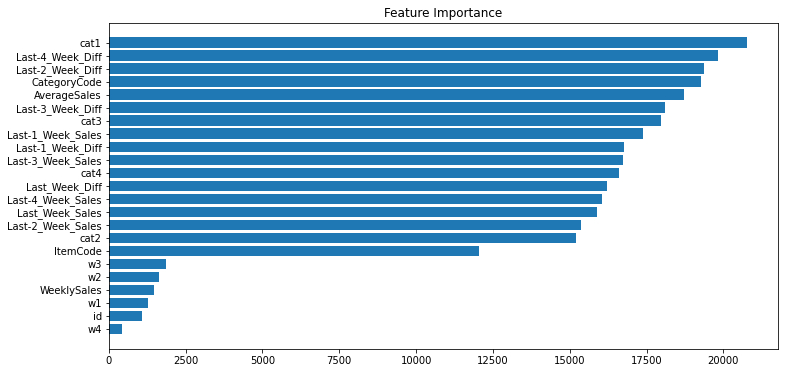

In [306]:
# **Feature Importance**
feature_importance = mdl.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(df.columns)[sorted_idx])
plt.title('Feature Importance')

In [286]:
train_test

,CategoryCode,ItemCode,Week,id,WeeklySales,w1,w2,w3,w4,cat1,...,Last-2_Week_Sales,Last-2_Week_Diff,Last-3_Week_Sales,Last-3_Week_Diff,Last-4_Week_Sales,Last-4_Week_Diff,Last-5_Week_Sales,Last-5_Week_Diff,Last-6_Week_Sales,Last-6_Week_Diff
0,category_2,174436,w1,1,35.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,category_2,174436,w2,2,64.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,category_2,174436,w3,3,60.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,category_2,174436,w4,4,69.0,0.0,0.0,0.0,1.0,0.0,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,category_2,174436,w1,5,85.0,1.0,0.0,0.0,0.0,0.0,...,64.0,34.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,category_2,267496,w4,16,10.0,0.0,0.0,0.0,1.0,0.0,...,9.0,0.0,10.0,-5.0,15.0,-1.0,11.0,-1.0,11.0,8.0
4145,category_2,267496,w1,17,10.0,1.0,0.0,0.0,0.0,0.0,...,8.0,1.0,9.0,0.0,10.0,-5.0,15.0,-1.0,11.0,-1.0
4146,category_2,267496,w2,18,11.0,0.0,1.0,0.0,0.0,0.0,...,10.0,2.0,8.0,1.0,9.0,0.0,10.0,-5.0,15.0,-1.0
4147,category_2,267496,w3,19,15.0,0.0,0.0,1.0,0.0,0.0,...,10.0,1.0,10.0,3.0,8.0,2.0,9.0,1.0,10.0,-4.0


In [287]:
mape = []
for error in mean_error:
    mape.append(error['mape'])
mape

[0.6661690889762542,
 0.5000499634228871,
 0.7292409952850183,
 0.4912086053209072]

In [288]:
pd.DataFrame(c[1])

,CategoryCode,ItemCode,Week,id,WeeklySales
21,category_2,174436,w2,22,5.334939
82,category_1,1061341,w2,22,13.088269
183,category_1,1054978,w2,22,4.574666
242,category_3,1060630,w2,22,20.733136
264,category_1,36898,w2,22,15.986854
...,...,...,...,...,...
3836,category_1,1075651,w2,22,8.062357
3872,category_3,893824,w2,22,5.328151
3892,category_2,1103056,w2,22,6.675539
3927,category_2,1105018,w2,22,10.337970


In [289]:
submissions = test_data.drop(['PredictedSales'], axis = 1)
submissions

,CategoryCode,ItemCode,Week,id
0,category_1,43738,w4,24
1,category_2,1006090,w1,21
2,category_2,1076929,w4,24
3,category_1,1081321,w3,23
4,category_2,216151,w4,24
...,...,...,...,...
372,category_2,1101571,w1,21
373,category_2,1090258,w4,24
374,category_2,906595,w1,21
375,category_2,32245,w1,21


In [290]:
all_concat = pd.concat([pd.DataFrame(c[0]), pd.DataFrame(c[1]),pd.DataFrame(c[2]),pd.DataFrame(c[3])])
all_concat

,CategoryCode,ItemCode,Week,id,WeeklySales
20,category_2,174436,w1,21,49.690067
80,category_1,1061341,w1,21,19.217535
180,category_1,1054978,w1,21,45.172928
238,category_3,1060630,w1,21,27.893922
259,category_1,36898,w1,21,77.542060
...,...,...,...,...,...
4016,category_1,1075651,w4,24,5.696999
4054,category_3,893824,w4,24,3.855542
4076,category_2,1103056,w4,24,6.145325
4113,category_2,1105018,w4,24,6.501684


In [291]:
submissions1 = pd.merge(submissions,all_concat, on=["CategoryCode","ItemCode","Week","id"], how = "left")
submissions1

,CategoryCode,ItemCode,Week,id,WeeklySales
0,category_1,43738,w4,24,17.712546
1,category_2,1006090,w1,21,12.570432
2,category_2,1076929,w4,24,4.854171
3,category_1,1081321,w3,23,5.450139
4,category_2,216151,w4,24,11.005400
...,...,...,...,...,...
372,category_2,1101571,w1,21,12.927856
373,category_2,1090258,w4,24,5.895047
374,category_2,906595,w1,21,9.623596
375,category_2,32245,w1,21,40.117116


In [292]:
submissions1['ID'] = [str(category)+'_'+str(item)+'_'+str(week) for category,item,week in zip(submissions1['CategoryCode'], submissions1['ItemCode'],submissions1['Week'])]
submissions1['ID']

0        category_1_43738_w4
1      category_2_1006090_w1
2      category_2_1076929_w4
3      category_1_1081321_w3
4       category_2_216151_w4
               ...          
372    category_2_1101571_w1
373    category_2_1090258_w4
374     category_2_906595_w1
375      category_2_32245_w1
376    category_2_1006090_w2
Name: ID, Length: 377, dtype: object

In [293]:
submissions1[['ID','WeeklySales']].to_csv("submissions_4.csv", index = False)

In [296]:
submissions0 = pd.read_csv(r'../submissions/submission_0_naive_forecast_with_average (7).csv')
submissions0

,ID,WeeklySales
0,category_2_87559_w1,24.300000
1,category_2_9925_w1,11.900000
2,category_2_999403_w1,15.150000
3,category_2_1103056_w1,16.333333
4,category_2_838456_w1,15.850000
...,...,...
372,category_2_87559_w4,24.300000
373,category_3_37861_w4,135.450000
374,category_1_1067119_w4,25.400000
375,category_1_839374_w4,40.200000


In [297]:
pd.merge(submissions0[['ID','WeeklySales']], submissions1[['ID','WeeklySales']] , on = ['ID'])

,ID,WeeklySales_x,WeeklySales_y
0,category_2_87559_w1,24.300000,32.606634
1,category_2_9925_w1,11.900000,15.115041
2,category_2_999403_w1,15.150000,17.306741
3,category_2_1103056_w1,16.333333,12.290870
4,category_2_838456_w1,15.850000,20.322256
...,...,...,...
372,category_2_87559_w4,24.300000,5.206343
373,category_3_37861_w4,135.450000,37.305686
374,category_1_1067119_w4,25.400000,5.929717
375,category_1_839374_w4,40.200000,11.925145


In [299]:
submissions1

,CategoryCode,ItemCode,Week,id,WeeklySales,ID
0,category_1,43738,w4,24,17.712546,category_1_43738_w4
1,category_2,1006090,w1,21,12.570432,category_2_1006090_w1
2,category_2,1076929,w4,24,4.854171,category_2_1076929_w4
3,category_1,1081321,w3,23,5.450139,category_1_1081321_w3
4,category_2,216151,w4,24,11.005400,category_2_216151_w4
...,...,...,...,...,...,...
372,category_2,1101571,w1,21,12.927856,category_2_1101571_w1
373,category_2,1090258,w4,24,5.895047,category_2_1090258_w4
374,category_2,906595,w1,21,9.623596,category_2_906595_w1
375,category_2,32245,w1,21,40.117116,category_2_32245_w1
